<a href="https://colab.research.google.com/github/Samsriddhi/retinaface_implementation/blob/main/implementation_serengil_retinaface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/serengil/retinaface.git
%cd retinaface


Cloning into 'retinaface'...
remote: Enumerating objects: 801, done.
remote: Counting objects: 100% (339/339), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 801 (delta 195), reused 222 (delta 146), pack-reused 462
Receiving objects: 100% (801/801), 13.77 MiB | 13.03 MiB/s, done.
Resolving deltas: 100% (429/429), done.
/content/retinaface


In [ ]:
!pip install numpy
!pip install opencv-python
!pip install tensorflow
!pip install Cython
!pip install cmake


In [ ]:
import sys
sys.path.append('/content/retinaface')


In [ ]:
!mkdir -p models
# !wget -O models/mobilenet0.25_Final.pth https://drive.google.com/uc?id=1tsASz2r9MGBJfY6Zr6nm5H2K4G0qvvIa


In [ ]:
from retinaface.RetinaFace import detect_faces, extract_faces  # Import the main functions from RetinaFace.py
from retinaface.model.retinaface_model import build_model  # Import the function to build the model
from retinaface.commons import postprocess, preprocess

In [ ]:
# %pip install retinaface
# %pip install commons.postprocess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 17.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of retinaface to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 58.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of retinaface to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install retinaface==0.0.1, retinaface==0.0.2, retinaface==0.0.3, retinaface==0.0.4, retinaface==0.0.5, retinaface==0.0.6, retinaface==1.1.0 and retinaface==1.1.1 because these package versions have conflicting dependen

In [ ]:
import numpy as np
import cv2

print("Numpy version:", np.__version__)
print("OpenCV version:", cv2.__version__)
#tf is 2.15

Numpy version: 1.25.2
OpenCV version: 4.8.0


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow


In [ ]:
import torch

In [ ]:
# !cat /content/retinaface/retinaface/RetinaFace.py


import os
import warnings
import logging
from typing import Union, Any, Optional, Dict

# this has to be set before importing tf
os.environ["TF_USE_LEGACY_KERAS"] = "1"

# pylint: disable=wrong-import-position
import numpy as np
import tensorflow as tf

from retinaface import __version__
from retinaface.model import retinaface_model
from retinaface.commons import preprocess, postprocess
from retinaface.commons.logger import Logger
from retinaface.commons import package_utils

# users should install tf_keras package if they are using tf 2.16 or later versions
package_utils.validate_for_keras3()

logger = Logger(module="retinaface/RetinaFace.py")

# pylint: disable=global-variable-undefined, no-name-in-module, unused-import, too-many-locals, redefined-outer-name, too-many-statements, too-many-arguments

# ---------------------------

# configurations
warnings.filterwarnings("ignore")
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
# Limit the amount of reserved VRAM so that other scripts can be

In [ ]:
model = build_model()
model.load_weights('/root/.deepface/weights/retinaface.h5') #secret directory

24-06-15 05:17:36 - Directory /root/.deepface created
24-06-15 05:17:36 - Directory /root/.deepface/weights created
24-06-15 05:17:36 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:00<00:00, 380MB/s]


In [ ]:
import os
print(os.getcwd())


/content/retinaface


In [ ]:
image_path = '/content/jolie.png'  # Change this to your image path
faces = detect_faces(img_path=image_path, model=model)

In [ ]:
print(faces)

{'face_1': {'score': 0.9994113445281982, 'facial_area': [136, 70, 339, 349], 'landmarks': {'right_eye': [211.4927, 188.33974], 'left_eye': [303.3947, 186.48613], 'nose': [272.74832, 241.58055], 'mouth_right': [217.93715, 280.74872], 'mouth_left': [298.34958, 278.30832]}}}


In [ ]:
from google.colab.patches import cv2_imshow

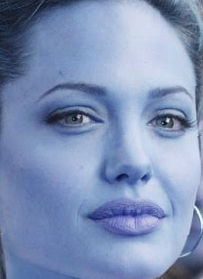

In [ ]:

extracted_faces = extract_faces(img_path=image_path, model=model)
for i, face in enumerate(extracted_faces):
    cv2_imshow( face)
cv2.waitKey(0)
cv2.destroyAllWindows()

TO TRAIN OWN

In [ ]:
!pip install mxnet-cu112
#!pip install cv2
!pip install gdown


     ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/499.4 MB 134.8 MB/s eta 0:00:03
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/urllib3/response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/urllib3/response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/cachecontrol/filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "/usr/lib/python3.10/http/client.py", line 466, in read
    s = self.fp.read(amt)
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.10/ssl.py", line 1303, in recv_into
    return self.read(nbytes,

In [ ]:
import zipfile
import os

# Define the path to the zip file and the directory to extract to
zip_file_path = '/content/retinaface_gt_v1.1.zip'
extract_to_dir = '/content/retinaface/data'

# Create the target directory if it doesn't exist
os.makedirs(extract_to_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

# List the extracted files to verify
extracted_files = os.listdir(extract_to_dir)
print(extracted_files)


['val', 'train', 'test']


In [ ]:
import zipfile
import os

# Define the paths to the zip files and the directories to extract to
zip_files = {
    'train': '/content/WIDER_train.zip',
    'test': '/content/WIDER_test.zip',
    'val': '/content/WIDER_val.zip'
}

# Define the base extraction directory
extract_to_base_dir = '/content/retinaface/data'

# Extract each zip file to its corresponding directory
for key, zip_file_path in zip_files.items():
    if key == 'val':
        continue  # Skip extracting 'val' folder

    extract_to_dir = os.path.join(extract_to_base_dir, key, 'images')
    os.makedirs(extract_to_dir, exist_ok=True)

    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to_dir)
        print(f'Extracted {zip_file_path} to {extract_to_dir}')
    except zipfile.BadZipFile:
        print(f"Error: {zip_file_path} is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred while extracting {zip_file_path}: {e}")

# List the extracted files to verify
for key in ['train', 'test']:
    extracted_files = os.listdir(os.path.join(extract_to_base_dir, key, 'images'))
    print(f'Files extracted in {key} folder: {extracted_files[:5]}...')  # Display first 5 files


Error: /content/WIDER_train.zip is not a valid zip file.
Error: /content/WIDER_test.zip is not a valid zip file.
Files extracted in train folder: []...
Files extracted in test folder: []...


In [ ]:
zip_files = {
    'train': '/content/WIDER_train.zip',
    'test': '/content/WIDER_test.zip',
    'val': '/content/WIDER_val.zip'
}

# Define the base extraction directory
extract_to_base_dir = '/content/retinaface/data'

# Check if the files are valid zip files
for key, zip_file_path in zip_files.items():
    if not zipfile.is_zipfile(zip_file_path):
        print(f"Error: {zip_file_path} is not a valid zip file.")
    else:
        print(f"{zip_file_path} is a valid zip file.")

Error: /content/WIDER_train.zip is not a valid zip file.
Error: /content/WIDER_test.zip is not a valid zip file.
/content/WIDER_val.zip is a valid zip file.


In [ ]:
import os
import zipfile
import shutil

def is_zipfile(file_path):
    return zipfile.is_zipfile(file_path)

# Define the paths to the zip files and the directories to extract to
zip_files = {
    'train': '/content/WIDER_train.zip',
    'test': '/content/WIDER_test.zip',
    'val': '/content/WIDER_val.zip'
}

# Define the base extraction directory
extract_to_base_dir = '/content/retinaface/data'

# Remove existing images directory in val
val_images_dir = os.path.join(extract_to_base_dir, 'val', 'images')
if os.path.exists(val_images_dir):
    shutil.rmtree(val_images_dir)

# Extract each zip file to its corresponding directory
for key, zip_file_path in zip_files.items():
    if not is_zipfile(zip_file_path):
        print(f"Error: {zip_file_path} is not a valid zip file.")
        continue
    extract_to_dir = os.path.join(extract_to_base_dir, key)
    os.makedirs(extract_to_dir, exist_ok=True)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_dir)
    print(f"Extracted {zip_file_path} to {extract_to_dir}")

# Move files from nested directory to the images directory for val
wider_val_dir = os.path.join(extract_to_base_dir, 'val', 'WIDER_val', 'images')
if os.path.exists(wider_val_dir):
    for item in os.listdir(wider_val_dir):
        s = os.path.join(wider_val_dir, item)
        d = os.path.join(val_images_dir, item)
        shutil.move(s, d)
    shutil.rmtree(os.path.join(extract_to_base_dir, 'val', 'WIDER_val'))
    print(f"Moved contents of {wider_val_dir} to {val_images_dir}")
else:
    print(f"{wider_val_dir} does not exist.")

# Print out the directory structure to verify
for root, dirs, files in os.walk(extract_to_base_dir):
    level = root.replace(extract_to_base_dir, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")


Error: /content/WIDER_train.zip is not a valid zip file.
Error: /content/WIDER_test.zip is not a valid zip file.
Extracted /content/WIDER_val.zip to /content/retinaface/data/val
Moved contents of /content/retinaface/data/val/WIDER_val/images to /content/retinaface/data/val/images
data/
    val/
        images/
            61--Street_Battle/
                61_Street_Battle_streetfight_61_815.jpg
                61_Street_Battle_streetfight_61_12.jpg
                61_Street_Battle_streetfight_61_276.jpg
                61_Street_Battle_streetfight_61_432.jpg
                61_Street_Battle_streetfight_61_907.jpg
                61_Street_Battle_streetfight_61_665.jpg
                61_Street_Battle_streetfight_61_211.jpg
                61_Street_Battle_streetfight_61_123.jpg
                61_Street_Battle_streetfight_61_212.jpg
                61_Street_Battle_streetfight_61_155.jpg
                61_Street_Battle_streetfight_61_179.jpg
                61_Street_Battle_streetfig

data loaded, now lets train

In [ ]:
import os
import argparse
import numpy as np
import tensorflow as tf
from retinaface.model.retinaface_model import build_model, load_weights
from retinaface.commons import preprocess
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import Sequence
import cv2

In [ ]:
train_script = """
import os
import argparse
import numpy as np
import tensorflow as tf
from retinaface.model.retinaface_model import build_model, load_weights
from retinaface.commons import preprocess
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, MeanSquaredError
from tensorflow.keras.utils import Sequence
import cv2

def parse_args():
    parser = argparse.ArgumentParser(description='Train RetinaFace')
    parser.add_argument('--epochs', default=2, type=int, help='Number of epochs to train for')
    parser.add_argument('--batch_size', default=8, type=int, help='Batch size for training')
    parser.add_argument('--lr', default=0.001, type=float, help='Learning rate')
    parser.add_argument('--dataset_path', type=str, help='Path to the training dataset')
    parser.add_argument('--save_path', default='./models', type=str, help='Path to save the trained model')
    return parser.parse_args()

class CustomDataset(Sequence):
    def __init__(self, dataset_path, batch_size):
        self.dataset_path = dataset_path
        self.image_paths = []
        self.labels = []
        self.batch_size = batch_size

        # Read image paths and labels from label.txt
        with open(os.path.join(dataset_path, 'label.txt'), 'r') as f:
            lines = f.readlines()
            for line in lines:
                if line.startswith('#'):
                    continue
                parts = line.strip().split()
                # Traverse all subdirectories
                for root, dirs, files in os.walk(os.path.join(dataset_path, 'images')):
                    for file in files:
                        if file == parts[0]:
                            self.image_paths.append(os.path.join(root, file))
                            label = list(map(int, parts[1:]))
                            self.labels.append(label)

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def __getitem__(self, idx):
        batch_x = self.image_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]

        imgs = []
        labels = []
        for img_path, label in zip(batch_x, batch_y):
            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Unable to read image {img_path}. Skipping.")
                continue
            img, im_info, im_scale = preprocess.preprocess_image(img, allow_upscaling=True)
            img = cv2.resize(img, (1024, 1024))  # Resize image to 1024x1024
            imgs.append(img)
            labels.append(label)

        if not imgs:  # If imgs is empty
            print("Warning: No valid images in this batch. Skipping batch.")
            return np.array([]), np.array([])

        imgs = np.array(imgs)
        labels = np.array(labels)
        return imgs, labels

def get_data_loader(dataset_path, batch_size):
    dataset = CustomDataset(dataset_path, batch_size)
    data_loader = tf.data.Dataset.from_generator(
        lambda: dataset,
        output_types=(tf.float32, tf.int32),
        output_shapes=([None, 1024, 1024, 3], [None, None])
    )
    data_loader = data_loader.batch(batch_size)
    return data_loader

def custom_loss(y_true, y_pred):
    # Convert predictions to tensor
    y_pred = tf.convert_to_tensor(y_pred)

    # Extract classification predictions
    cls_pred = y_pred[..., :2]  # First 2 values for classification

    # Extract bounding box regression predictions
    reg_pred = y_pred[..., 2:6]  # Next 4 values for bounding box

    # Extract landmark predictions
    landmark_pred = y_pred[..., 6:]  # Last 10 values for landmarks

    # Compute losses
    cls_loss = SparseCategoricalCrossentropy(from_logits=True)(y_true[..., 0], cls_pred)
    reg_loss = MeanSquaredError()(y_true[..., 1:5], reg_pred)
    landmark_loss = MeanSquaredError()(y_true[..., 5:], landmark_pred)

    return cls_loss + reg_loss + landmark_loss

def train_model(model, data_loader, epochs, batch_size, lr):
    optimizer = Adam(learning_rate=lr)

    for epoch in range(epochs):
        for batch_idx, (data, label) in enumerate(data_loader):
            if data.shape[0] == 0:  # Skip empty batches
                continue
            with tf.GradientTape() as tape:
                output = model(data, training=True)
                loss = custom_loss(label, output)
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            if batch_idx % 100 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Batch {batch_idx}, Loss: {loss.numpy()}")

    model.save_weights(os.path.join(args.save_path, 'retinaface.h5'))

if __name__ == '__main__':
    args = parse_args()

    # Ensure model is built using serengil's function
    model = build_model()

    # Ensure data preprocessing is done using serengil's preprocess module
    data_loader = get_data_loader(args.dataset_path, args.batch_size)
    train_model(model, data_loader, args.epochs, args.batch_size, args.lr)
"""

with open('/content/retinaface/train.py', 'w') as f:
    f.write(train_script)


In [ ]:
!python /content/retinaface/train.py --dataset_path /content/retinaface/data/val --epochs 1 --batch_size 8 --lr 0.001 --save_path /content/retinaface/models


In [ ]:
import os
from retinaface.model.retinaface_model import build_model

def load_trained_model(weights_path):
    model = build_model()
    model.load_weights(weights_path)
    return model

# Specify the path to the weights file
weights_path = "/content/retinaface/models/retinaface.h5"

# Load the model with the trained weights
model = load_trained_model(weights_path)
print("Model loaded with trained weights.")


Model loaded with trained weights.


INFERENCE

In [ ]:
image_path = '/content/jolie.png'  # Change this to your image path
faces = detect_faces(img_path=image_path, model=model)

In [ ]:
faces

{'face_1': {'score': 0.9994113445281982,
  'facial_area': [136, 70, 339, 349],
  'landmarks': {'right_eye': [211.4927, 188.33974],
   'left_eye': [303.3947, 186.48613],
   'nose': [272.74832, 241.58055],
   'mouth_right': [217.93715, 280.74872],
   'mouth_left': [298.34958, 278.30832]}}}

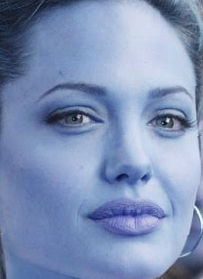

In [115]:
from google.colab.patches import cv2_imshow
extracted_faces = extract_faces(img_path=image_path, model=model)
for i, face in enumerate(extracted_faces):
    cv2_imshow( face)
cv2.waitKey(0)
cv2.destroyAllWindows()